In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit_ibm_runtime.estimator import EstimatorV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

### Creation of Bell State

$\beta_{00} = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

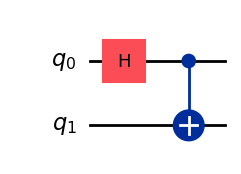

In [12]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)

circuit.draw(output='mpl')

2 ways to measure:
- Get probability of measuring basis state
- Get expectation value of Observable ?

In [13]:
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [14]:
backend = FakeAlmadenV2()
estimator = EstimatorV2(backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()[0]

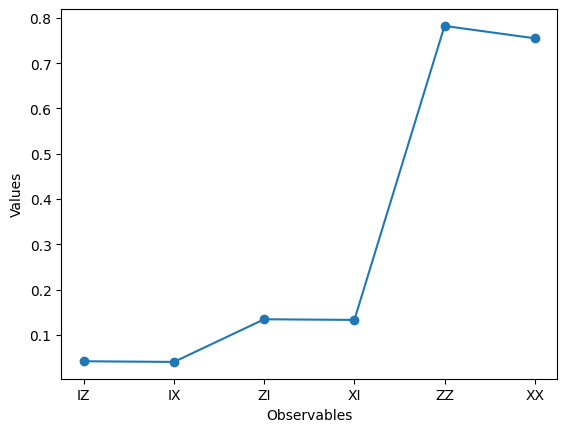

In [15]:
from matplotlib import pyplot as plt
 
values = result.data.evs
 
errors = result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

In [16]:
from qiskit.quantum_info import Statevector
from math import sqrt

# Show reduced measurement results
plus = Statevector.from_label('+')
statevector = Statevector([1/ sqrt(3), sqrt(2)/ sqrt(3)])

psi = plus.tensor(statevector)

psi.draw('latex')

<IPython.core.display.Latex object>

### Showcase how partial measurement works

In [17]:
result, new_psi = psi.measure([0])

new_psi.draw('latex')

<IPython.core.display.Latex object>

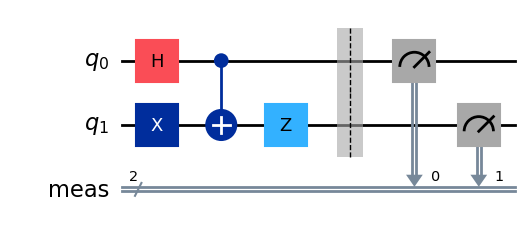

In [34]:
circuit = QuantumCircuit(2)
circuit.x(1)

circuit.h(0)
circuit.cx(0, 1)

circuit.z(1)

circuit.measure_all()

circuit.draw(output='mpl')

In [35]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend)
isa_circuit = pm.run(circuit)

result = sampler.run([isa_circuit], shots=1000).result()
result[0].data.meas.get_counts()

{'11': 5, '10': 429, '01': 457, '00': 109}